Loading Necessary Libraries and the Dataset

In [590]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('unclean_smartwatch_health_data.csv')

Displaying basic info about the dataset

In [591]:
print("Dataset Overview:")
print("Shape : "+str(df.shape))
df.head()

Dataset Overview:
Shape : (10000, 7)


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


1) Data Cleaning


Missing Values Before Cleaning:
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


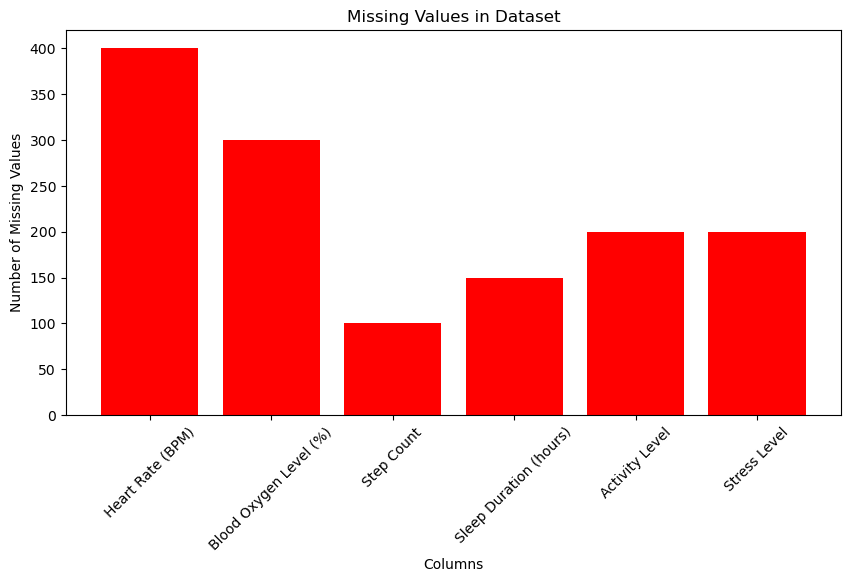

In [593]:
df.drop(columns=['User ID'], inplace=True)
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


plt.figure(figsize=(10, 5))
missing = df.isnull().sum()
missing = missing[missing > 0]
plt.bar(missing.index, missing.values, color='red')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Dataset")
plt.xticks(rotation=45)
plt.show()


In [594]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipykernel_19392/3674806284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [595]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Heart Rate (BPM)          0
Blood Oxygen Level (%)    0
Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
dtype: int64


In [596]:
df.drop_duplicates(inplace=True)
print("\nDuplicate Entries Removed.")


Duplicate Entries Removed.


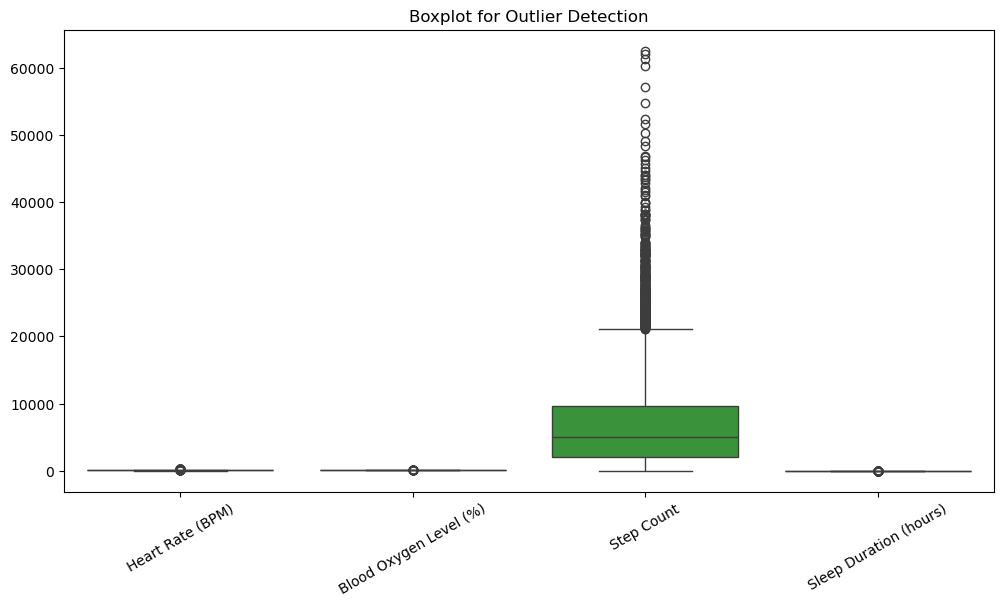

In [597]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=30)
plt.show()


In [598]:
num_cols = df.select_dtypes(include=[np.number])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

df_cleaned = df[~outliers.any(axis=1)]
print(f"\nOutliers Removed using IQR method")

df = df_cleaned


Outliers Removed using IQR method


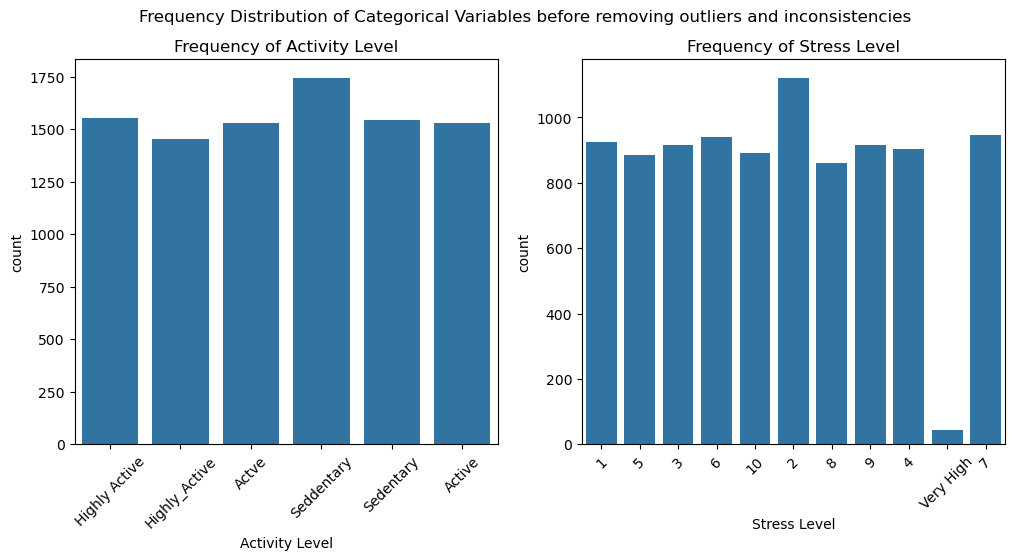

In [599]:
cat_cols = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 5))
fig.suptitle("Frequency Distribution of Categorical Variables before removing outliers and inconsistencies")

for ax, col in zip(axes, cat_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Frequency of {col}')
    ax.tick_params(axis='x', rotation=45)

In [600]:
df = df.apply(lambda x: x.str.lower().str.strip() if x.dtype == "object" else x)
T = 50
cat_cols = df.select_dtypes(include=['object']).columns  

for col in cat_cols:
    val_cnt = df[col].value_counts()
    rare_cats = val_cnt[val_cnt < T].index
    df = df[~df[col].isin(rare_cats)]

mapping_similar = {
    "highly active": "highly_active",
    "highly_active": "highly_active",
    "actve": "active",
    "active": "active",
    "seddentary": "sedentary",
    "sedentary": "sedentary"
}
df["Activity Level"] = df["Activity Level"].replace(mapping_similar)
print("\nCategorical Outliers Removed.")
print("Categorical Values Standardized And Activity Level Column fixed")



Categorical Outliers Removed.
Categorical Values Standardized And Activity Level Column fixed


2) Exploratory Data Analysis

a) Univariate Analysis

In [601]:
print("Stats : ")
print(df.describe())
skew=df.skew(numeric_only=True)
print("\nSkewness :")
print(skew)

Stats : 
       Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
count       9310.000000             9310.000000   9310.000000   
mean          75.055288               97.866908   5987.021899   
std           14.235614                1.673120   4988.997825   
min           40.000000               92.789499      1.829010   
25%           65.292677               96.731313   1938.141317   
50%           75.920583               97.951598   4700.339088   
75%           84.563356               99.337751   8749.265435   
max          113.898827              100.000000  21128.524886   

       Sleep Duration (hours)  
count             9310.000000  
mean                 6.503281  
std                  1.432249  
min                  2.640684  
25%                  5.548128  
50%                  6.505463  
75%                  7.459704  
max                 10.373567  

Skewness :
Heart Rate (BPM)         -0.012334
Blood Oxygen Level (%)   -0.508611
Step Count                0.978137


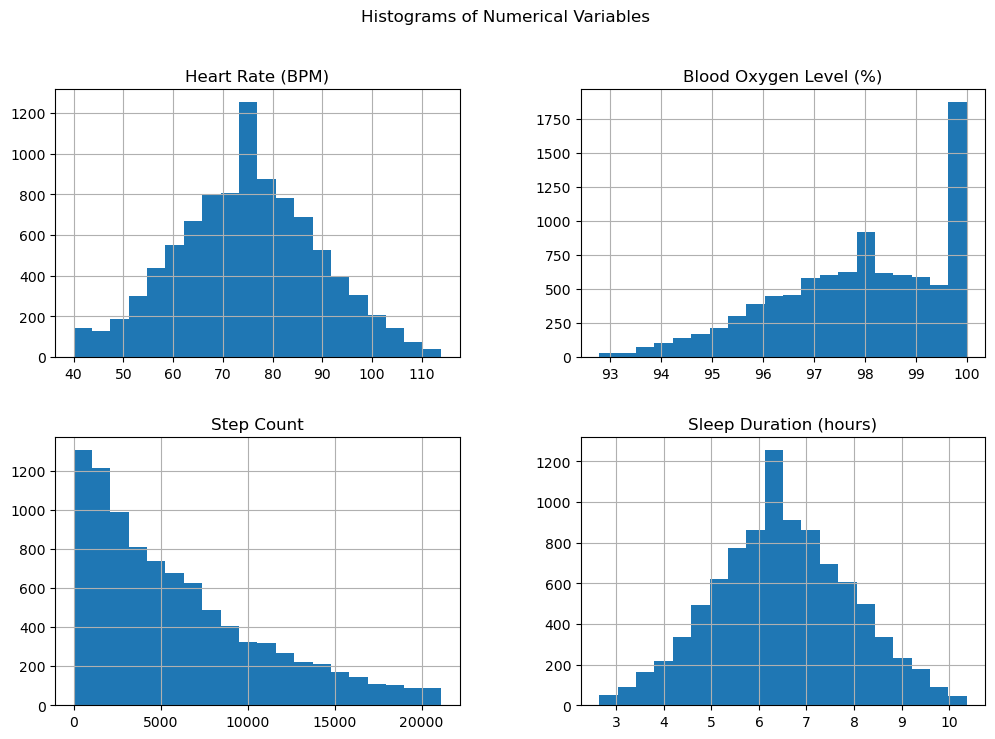

In [602]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

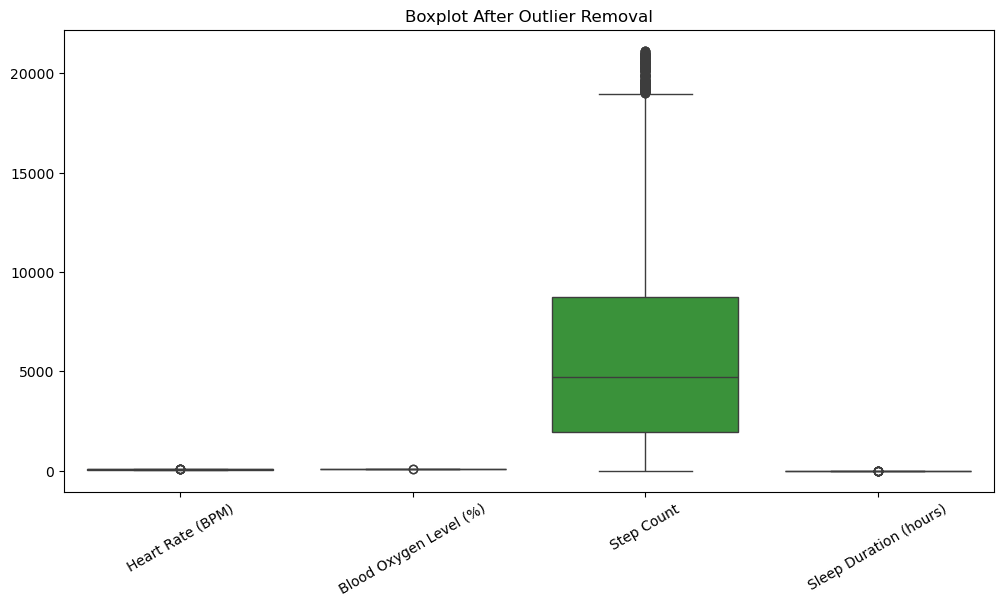

In [603]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=30)
plt.show()

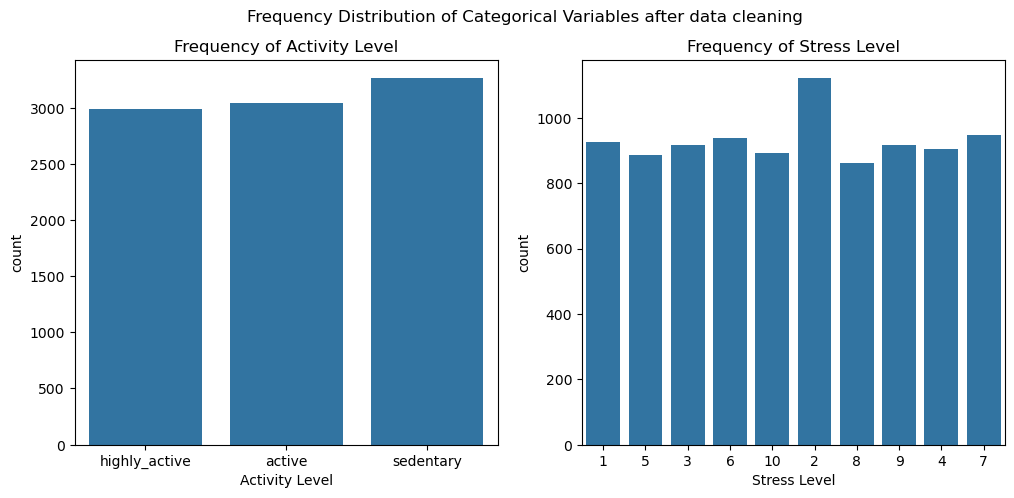

In [604]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 5))
fig.suptitle("Frequency Distribution of Categorical Variables after data cleaning")

for ax, col in zip(axes, cat_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Frequency of {col}')
    ax.tick_params(axis='x')

b) Bivariate Analysis

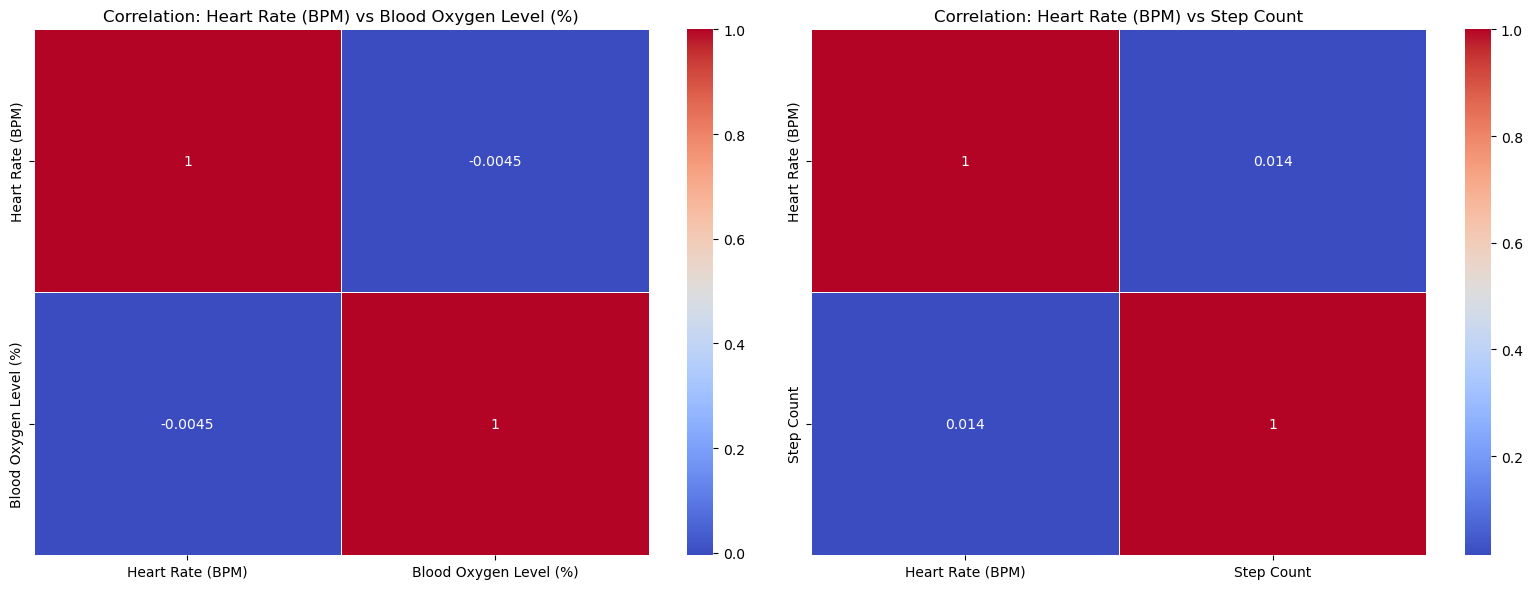

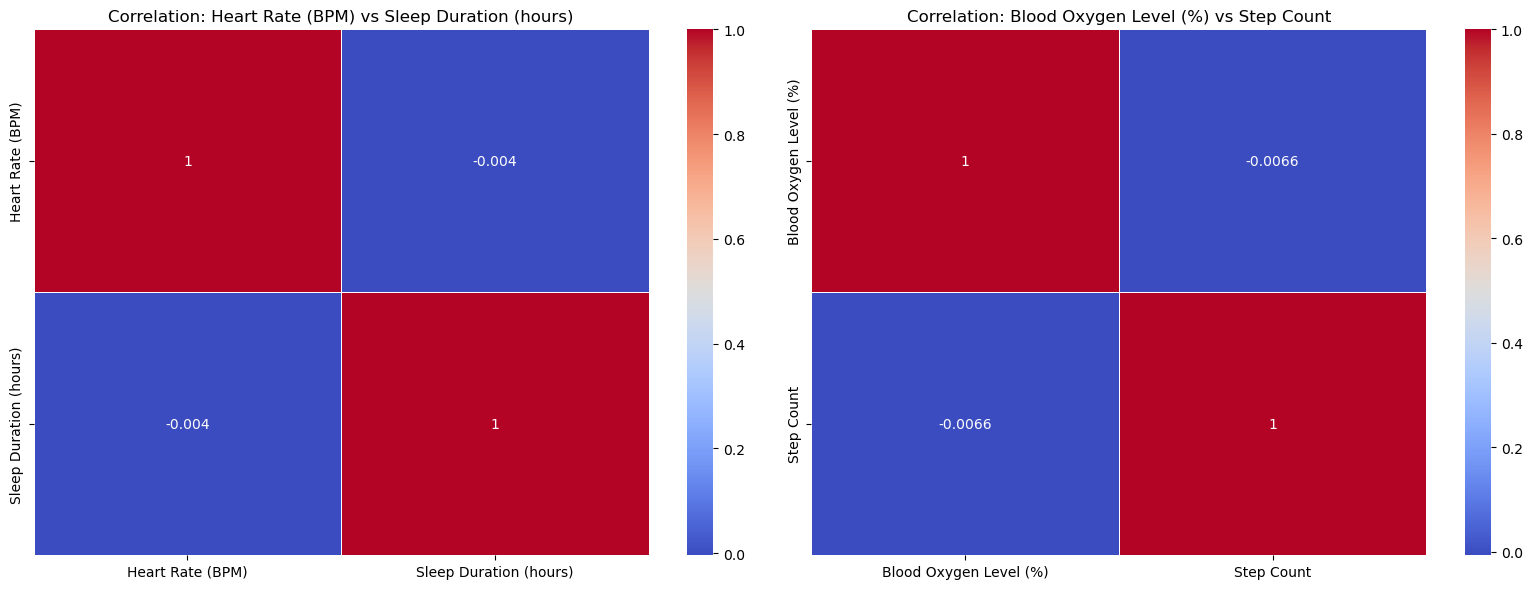

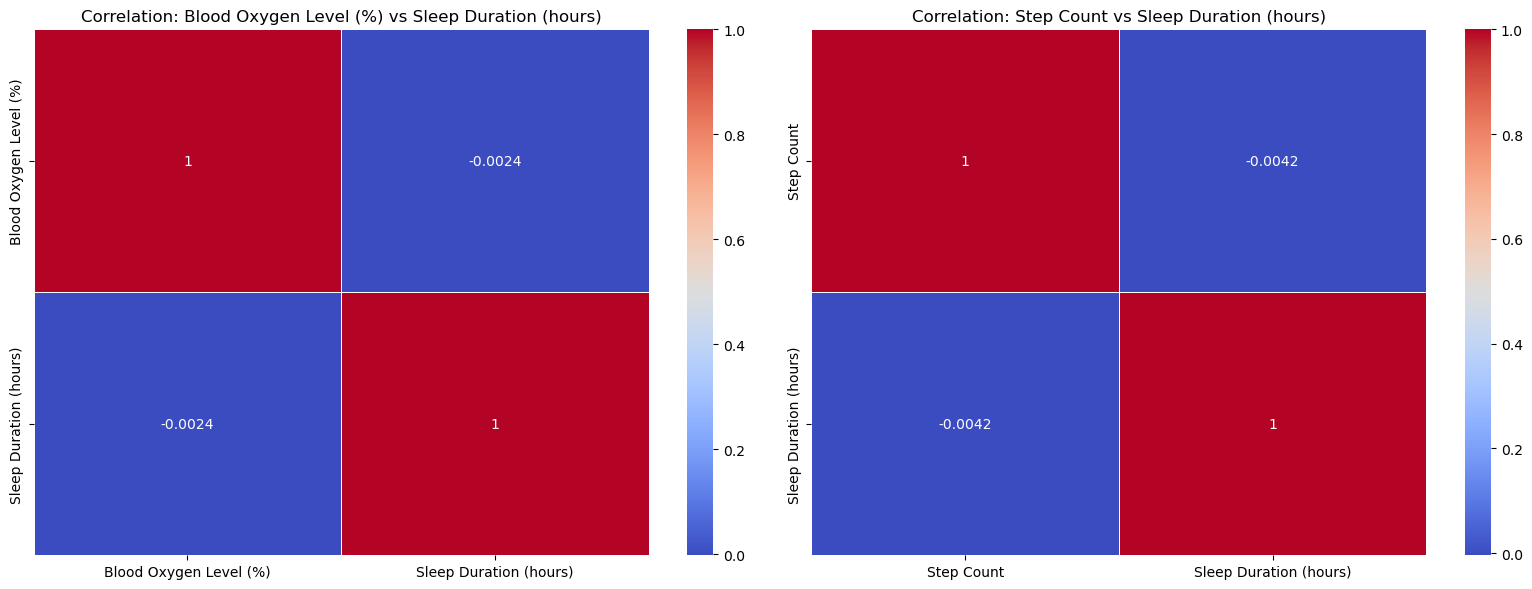

In [605]:
convert_to_float = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)']
for col in convert_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_numeric = df[convert_to_float]

p_c = 0
p_pair = []

for i, c1 in enumerate(df_numeric):
    for j, c2 in enumerate(df_numeric):
        if i < j:
            p_pair.append((c1, c2))

for k in range(0, len(p_pair), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    pair1 = p_pair[k]
    corr_matrix1 = df[[pair1[0], pair1[1]]].corr()
    sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
    axes[0].set_title(f"Correlation: {pair1[0]} vs {pair1[1]}")
    pair2 = p_pair[k+1]
    corr_matrix2 = df[[pair2[0], pair2[1]]].corr()
    sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"Correlation: {pair2[0]} vs {pair2[1]}")
    plt.tight_layout()
    plt.show()

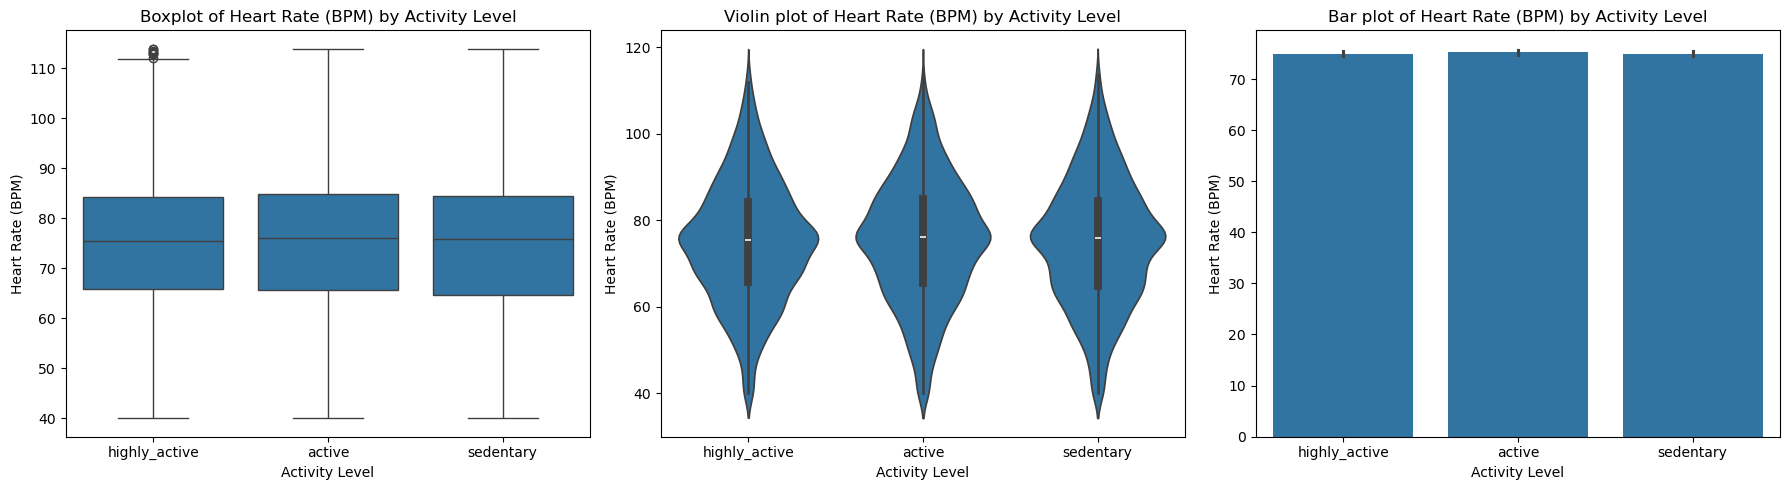

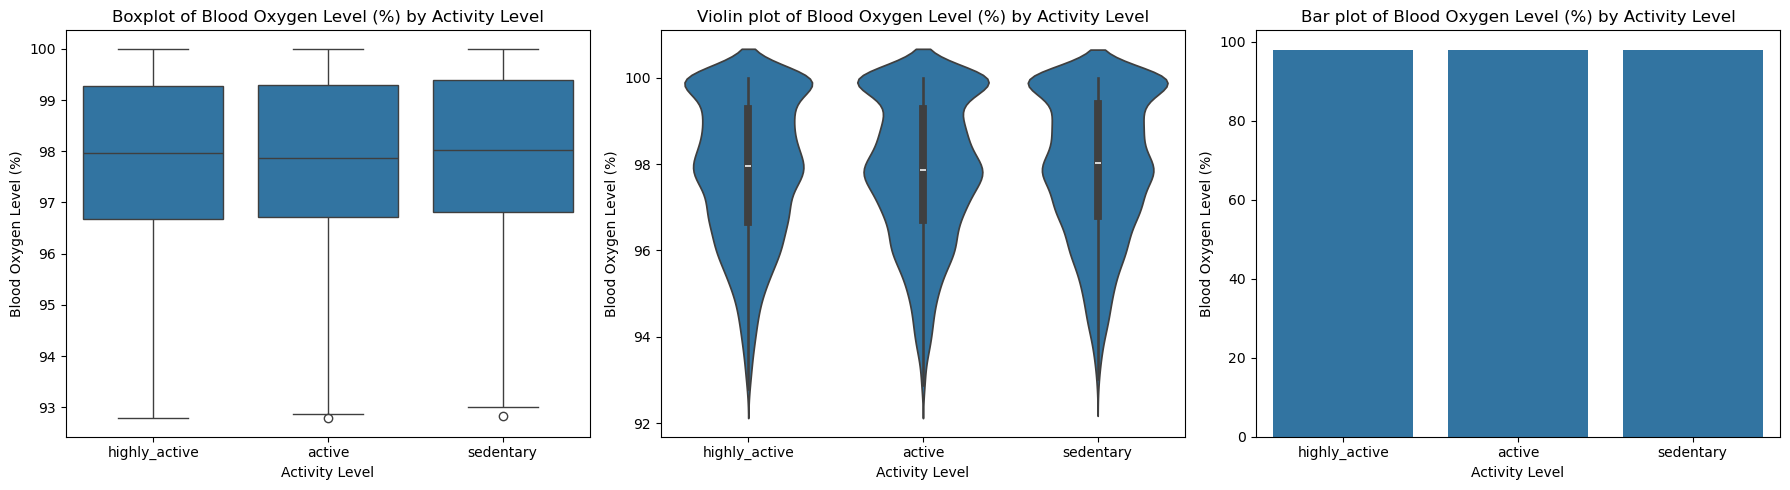

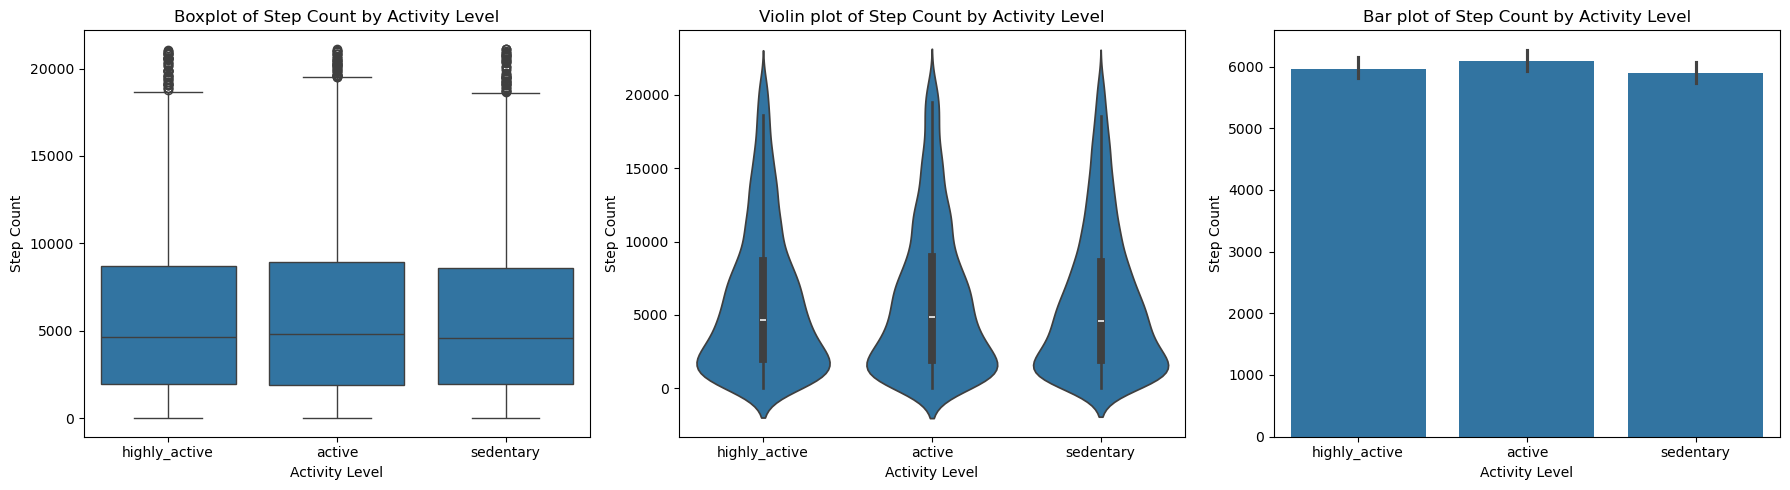

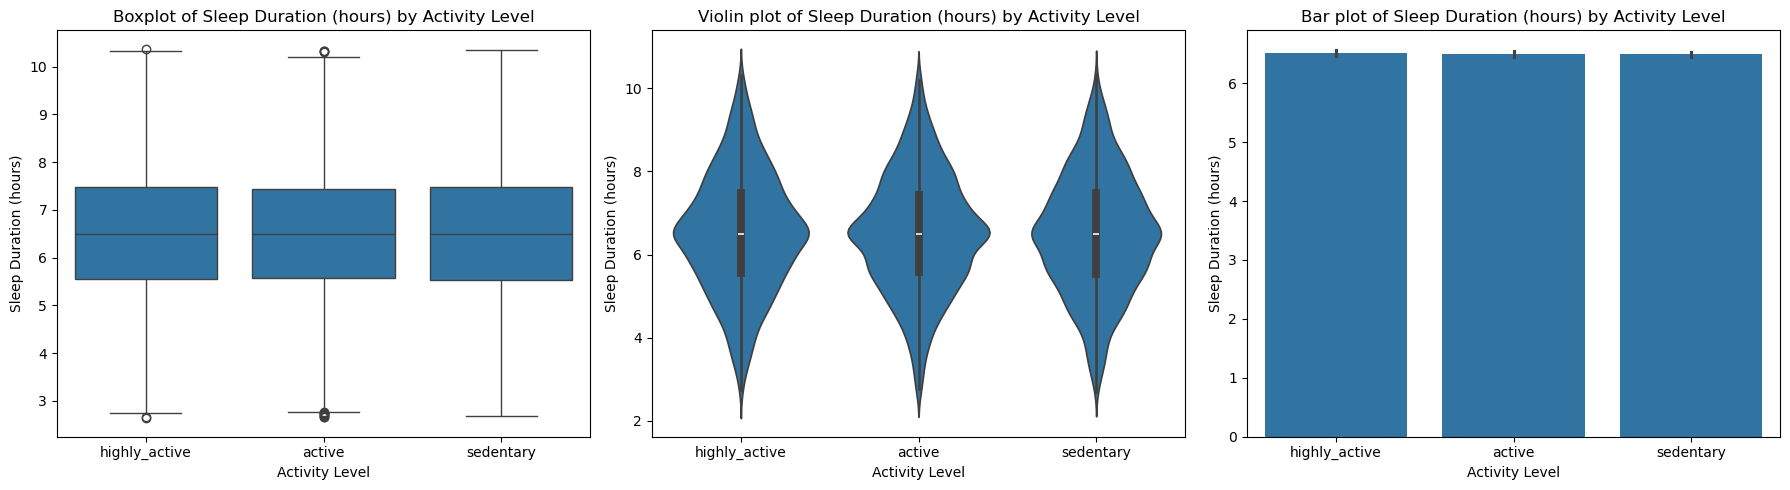

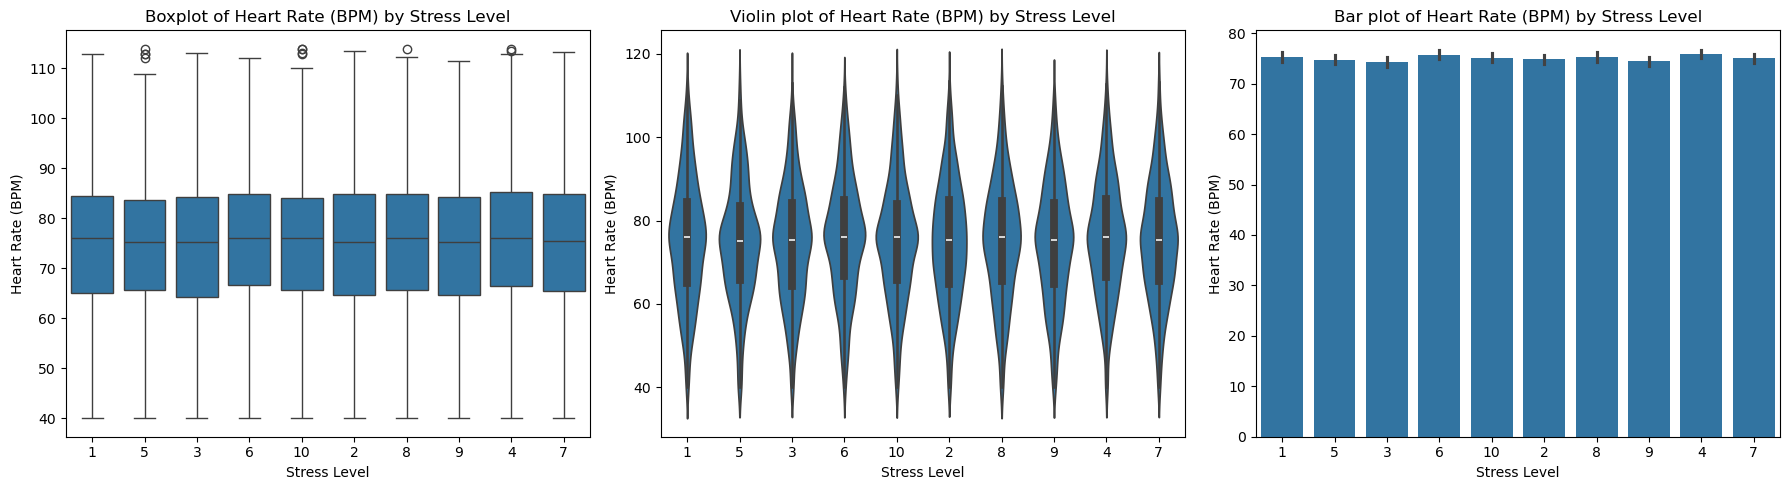

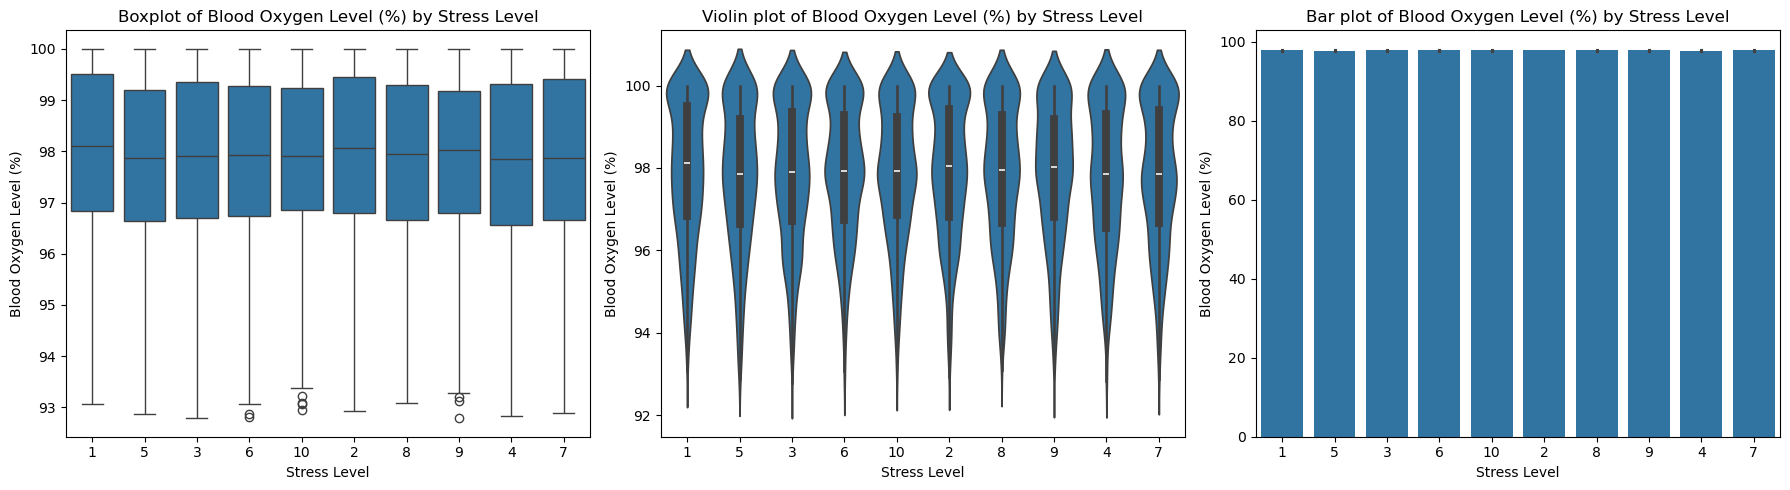

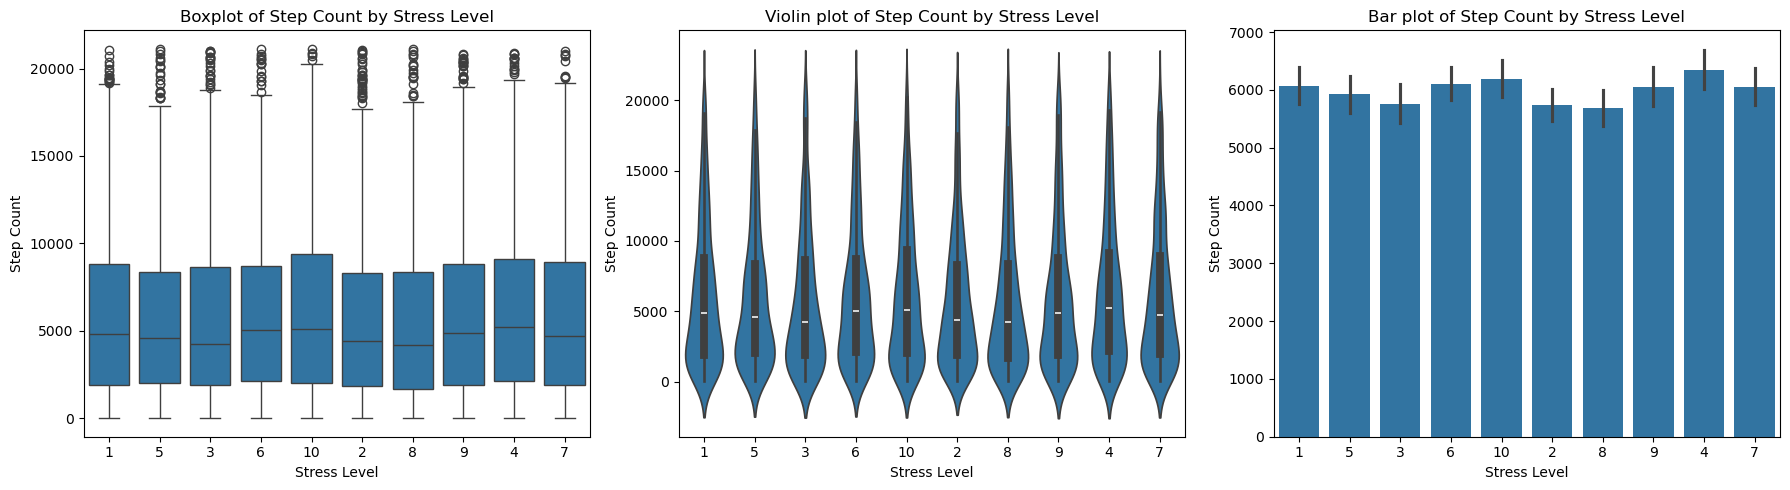

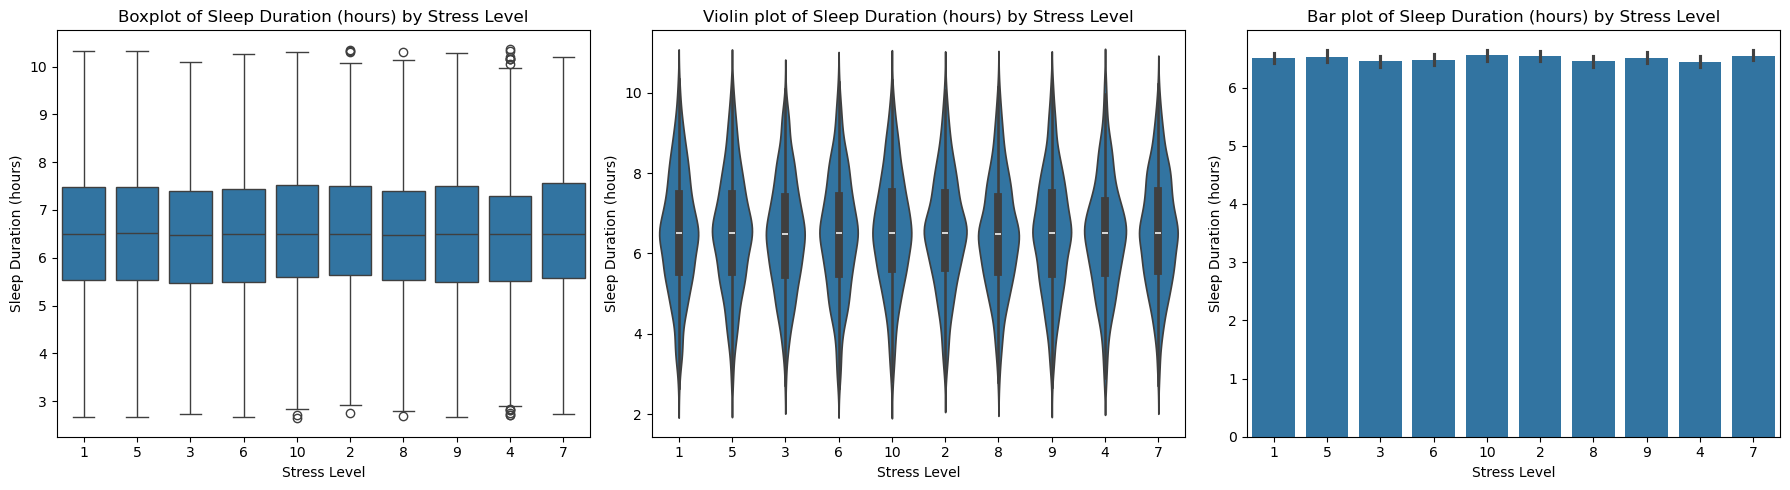

In [606]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

for c1 in cat_cols:
    for c2 in num_cols:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        sns.boxplot(x=df[c1], y=df[c2], ax=axes[0])
        axes[0].set_title(f'Boxplot of {c2} by {c1}')
        sns.violinplot(x=df[c1], y=df[c2], ax=axes[1])
        axes[1].set_title(f'Violin plot of {c2} by {c1}')
        sns.barplot(x=df[c1], y=df[c2], ax=axes[2])
        axes[2].set_title(f'Bar plot of {c2} by {c1}')
    
        plt.tight_layout()
        plt.show()

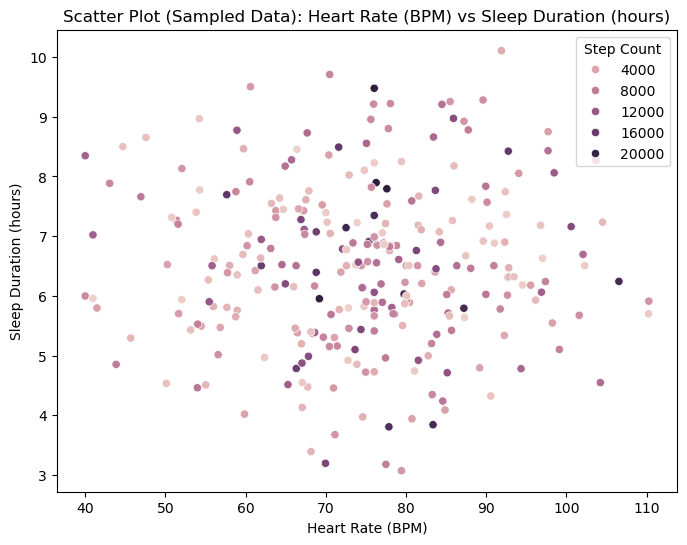

In [607]:
cols=['Heart Rate (BPM)','Sleep Duration (hours)']
sampled_df = df.sample(frac=0.03, random_state=42) 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sampled_df[cols[0]], y=sampled_df[cols[1]],hue=sampled_df['Step Count'])
plt.title(f"Scatter Plot (Sampled Data): {cols[0]} vs {cols[1]}")
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

c) Multivariate analysis

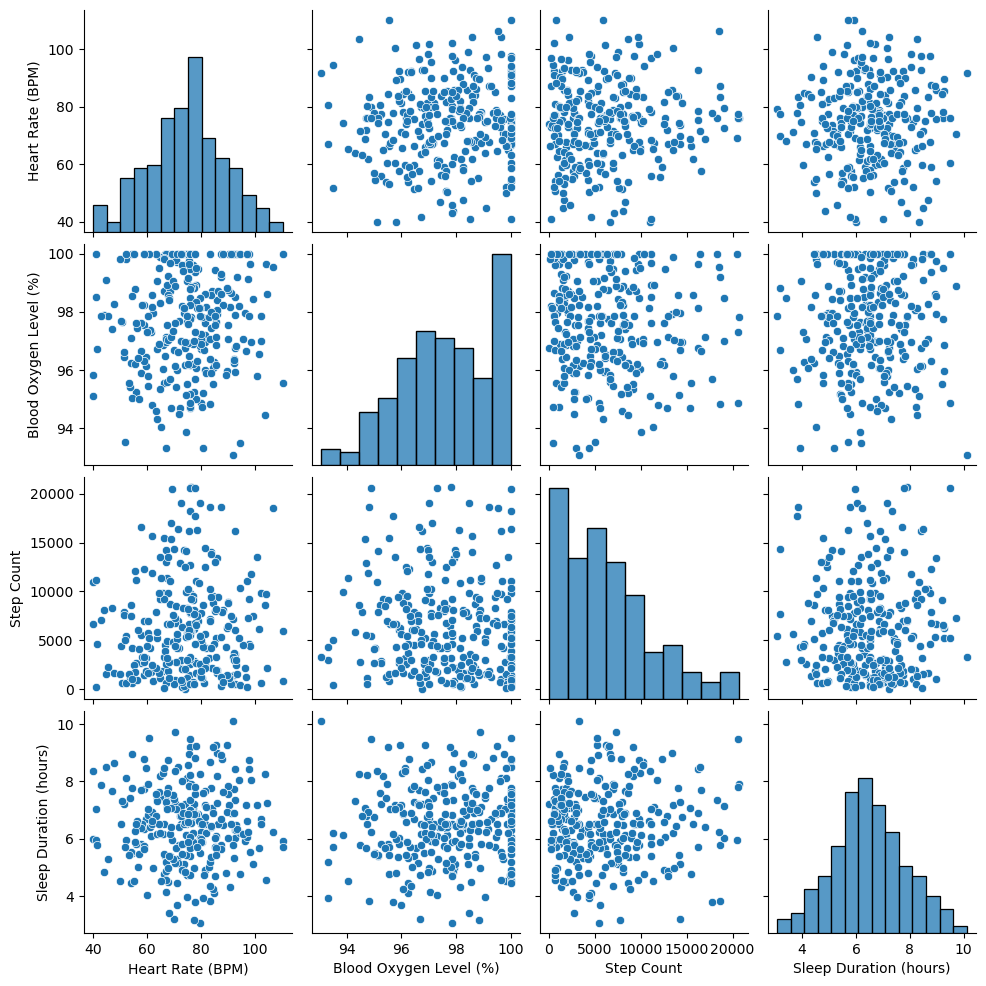

In [608]:
sns.pairplot(sampled_df.select_dtypes(include=[np.number]))
plt.show()

# Only a sample of the points are used so that some distinction can be seen in the pairplots. 
# With whole of the data , proper distinction cannot be made.

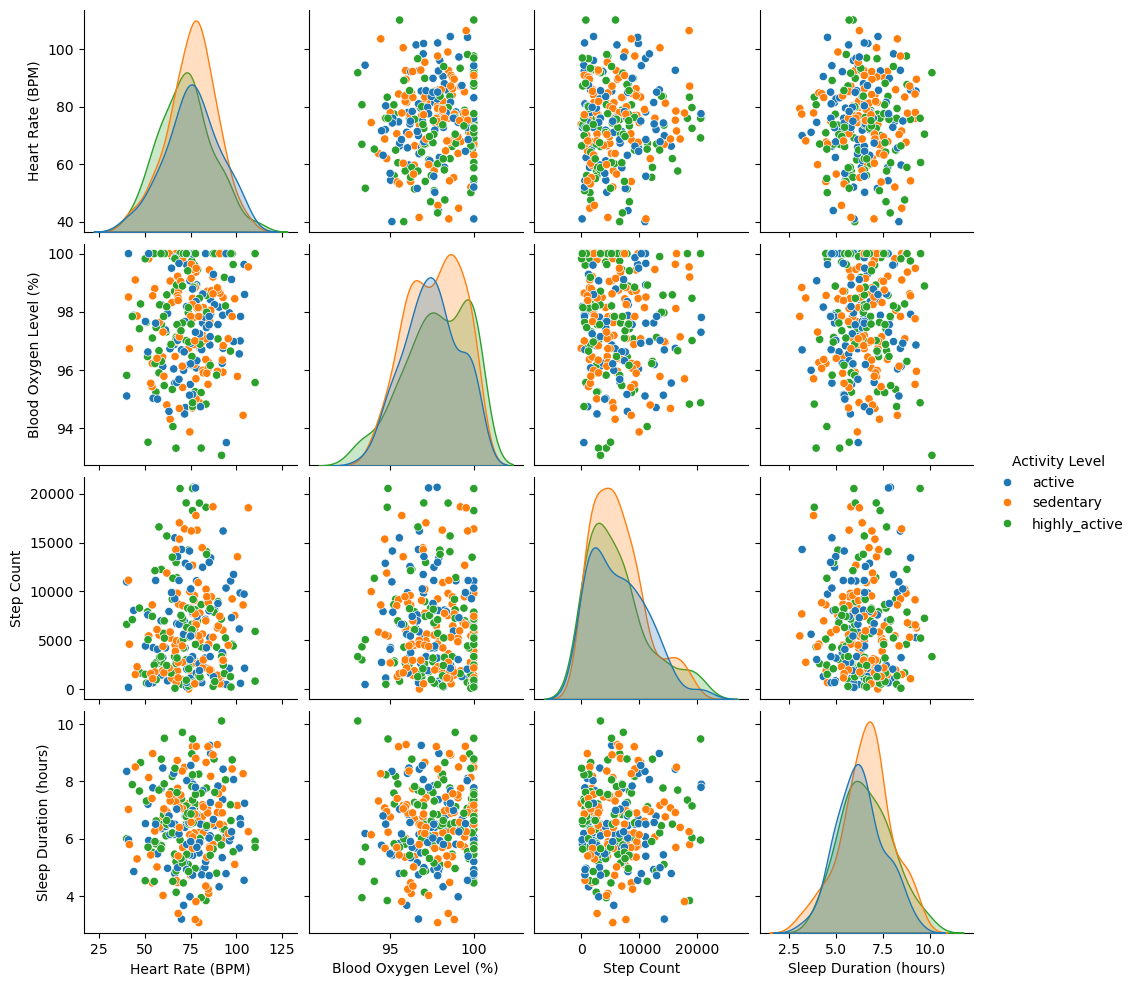

In [609]:
# sns.pairplot(df, hue=df.select_dtypes(include=['object']).columns[0])
# plt.show()

sns.pairplot(sampled_df, hue=sampled_df.select_dtypes(include=['object']).columns[0])
plt.show()



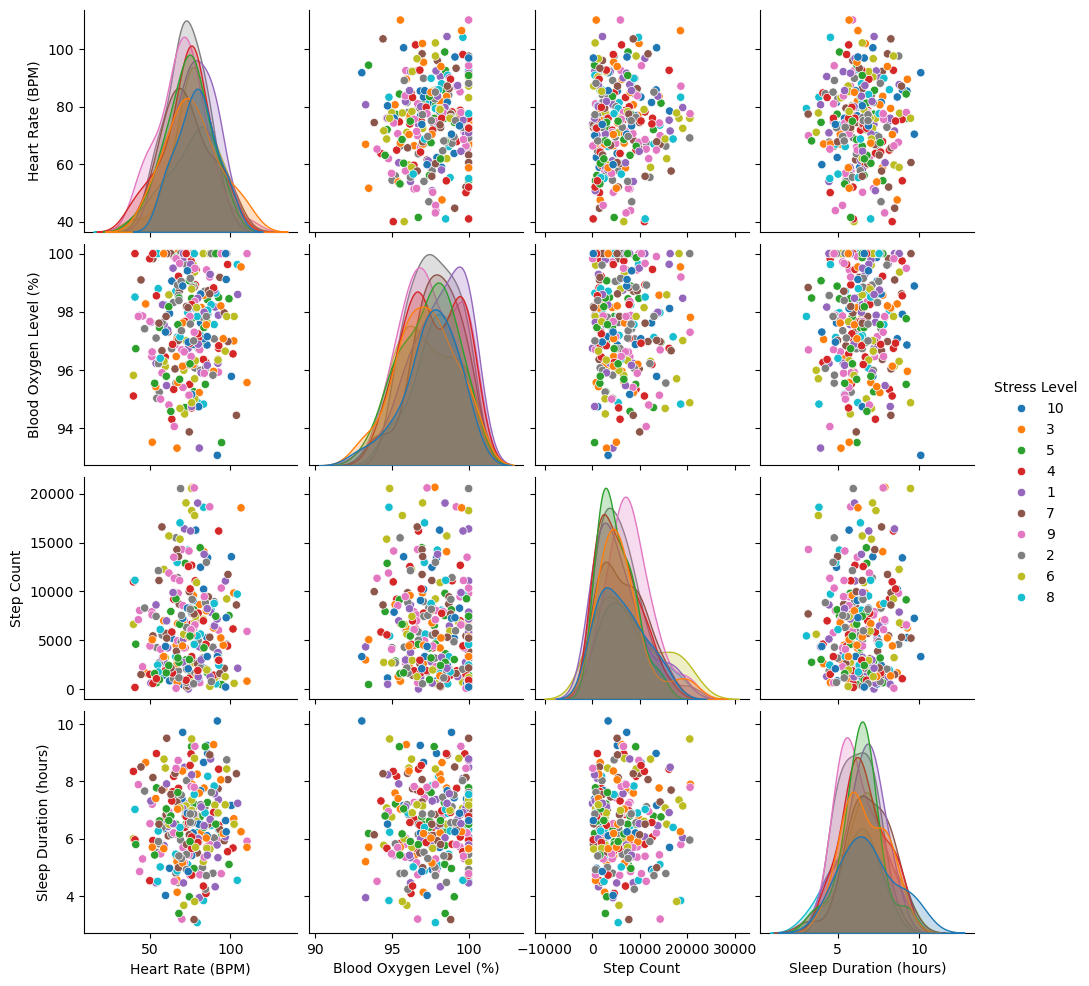

In [610]:
# sns.pairplot(df, hue=df.select_dtypes(include=['object']).columns[1])
# plt.show()

sns.pairplot(sampled_df, hue=sampled_df.select_dtypes(include=['object']).columns[1])
plt.show()

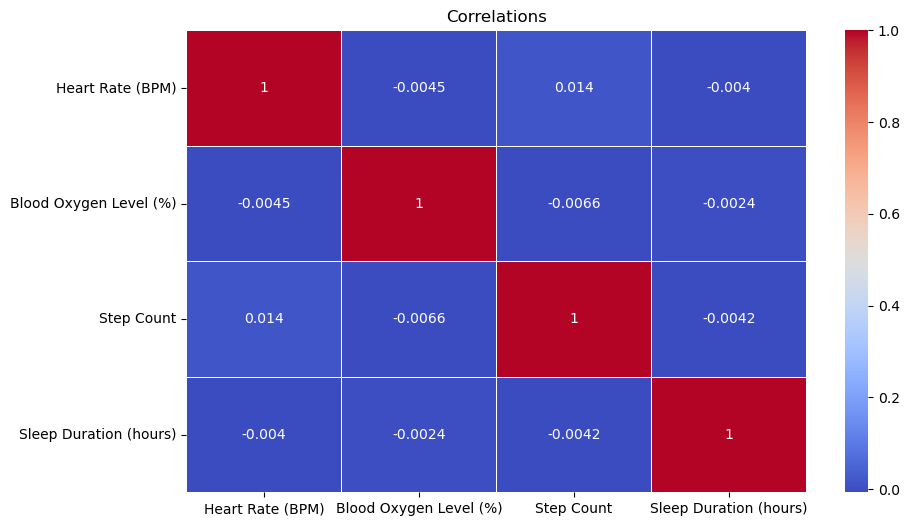

In [611]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlations")
plt.show()
